# Problem

company want to know in which price range they should sell there phone

In this project we try to predict by features of our mobile in which price range it should come so its a multiclass problem

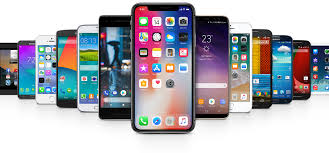

In [96]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
os.listdir()

['.ipynb_checkpoints',
 'images.jpg',
 'mobile price range.ipynb',
 'Mobile_data.csv']

In [98]:
df=pd.read_csv('Mobile_data.csv')

In [99]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


We have `2000` records and `15` columns

In [101]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

we have `4` different type of category

In [102]:
df.shape

(2000, 15)

In [103]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [104]:
def univariate_num(data,x):
    """one numerical variable analysis """
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round( data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=df, y=data[x])
    plt.show()
    return myvalue

In [105]:
df.sample(frac=0.1)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
645,1841,1.3,6,14,0.6,167,8,8,593,672,2304,7,1,18,2
196,1989,2.5,0,41,0.8,94,3,13,1100,1497,1665,17,9,12,2
1725,1117,0.5,2,21,0.1,177,2,19,495,1035,1999,15,9,2,1
864,1296,1.4,3,11,0.2,129,7,4,1222,1382,2552,19,8,10,2
272,1053,0.8,7,45,0.3,103,1,12,594,1767,3086,17,6,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,936,1.0,1,18,0.2,153,3,18,1330,1686,2391,12,6,3,2
709,1640,0.7,10,21,0.8,169,7,14,589,1301,337,16,3,5,0
1180,1479,1.8,0,24,0.1,146,6,0,327,645,3762,12,10,5,3
1207,627,1.8,2,20,0.8,142,3,8,211,507,896,17,6,14,0


In [106]:
df.describe(percentiles=[0.01,0.02,0.03,0.04,0.25,.50,.75,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,25%,50%,75%,95%,96%,97%,98%,99%,max
battery_power,2000.0,1238.51850,439.418206,501.0,510.00,524.96,538.97,556.92,851.75,1226.0,1615.25,1930.15,1946.08,1961.06,1974.00,1987.00,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.50,0.50,0.50,0.50,0.70,1.5,2.20,2.80,2.90,2.90,2.90,3.00,3.0
fc,2000.0,4.30950,4.341444,0.0,0.00,0.00,0.00,0.00,1.00,3.0,7.00,13.00,14.00,15.00,16.00,16.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,2.00,2.00,3.00,4.00,16.00,32.0,48.00,61.00,62.00,63.00,63.00,64.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.10,0.10,0.10,0.10,0.20,0.5,0.80,1.00,1.00,1.00,1.00,1.00,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,80.00,82.00,83.00,84.00,109.00,141.0,170.00,196.00,197.00,198.00,199.00,199.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,1.00,1.00,1.00,1.00,3.00,4.0,7.00,8.00,8.00,8.00,8.00,8.00,8.0
pc,2000.0,9.91650,6.064315,0.0,0.00,0.00,0.00,0.00,5.00,10.0,15.00,20.00,20.00,20.00,20.00,20.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,15.00,30.98,45.97,58.00,282.75,564.0,947.25,1485.05,1568.04,1618.03,1698.00,1791.01,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,512.99,526.96,542.00,562.00,874.75,1247.0,1633.00,1929.05,1947.00,1963.00,1974.00,1987.00,1998.0


In [107]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


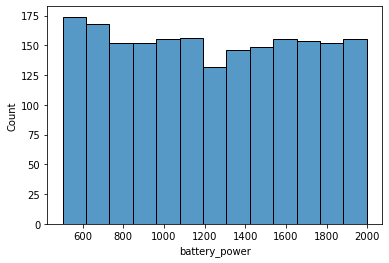

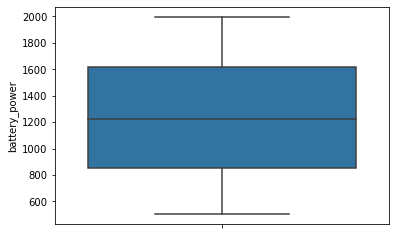

{'missing': 0,
 'min': 501,
 'max': 1998,
 'mean': 1238.52,
 'var': 193088.36,
 'std': 439.42,
 'range': 1497,
 'q1': 851.75,
 'q2': 1226.0,
 'q3': 1615.25,
 'skewness': 0.03,
 'kurtosis': -1.22}

In [108]:
univariate_num(data=df,x='battery_power')

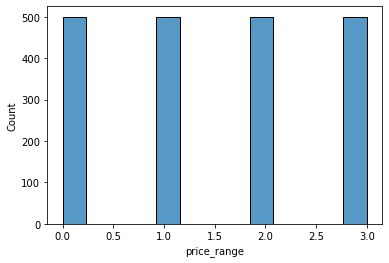

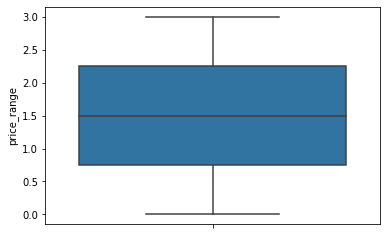

{'missing': 0,
 'min': 0,
 'max': 3,
 'mean': 1.5,
 'var': 1.25,
 'std': 1.12,
 'range': 3,
 'q1': 0.75,
 'q2': 1.5,
 'q3': 2.25,
 'skewness': 0.0,
 'kurtosis': -1.36}

In [109]:
univariate_num(data=df,x='price_range')

In [110]:
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [111]:
df.tail()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0
1999,510,2.0,5,45,0.9,168,6,16,483,754,3919,19,4,2,3


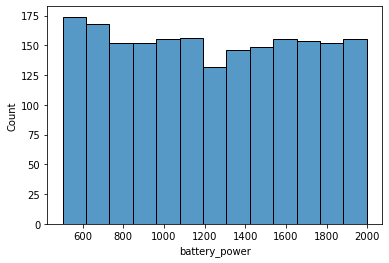

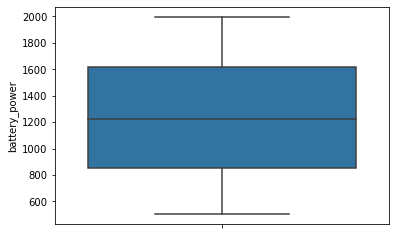

{'missing': 0,
 'min': 501,
 'max': 1998,
 'mean': 1238.52,
 'var': 193088.36,
 'std': 439.42,
 'range': 1497,
 'q1': 851.75,
 'q2': 1226.0,
 'q3': 1615.25,
 'skewness': 0.03,
 'kurtosis': -1.22}

In [112]:
univariate_num(data=df,x='battery_power')

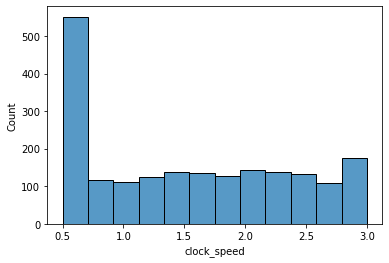

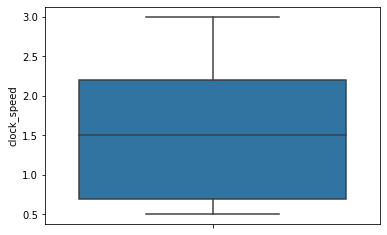

{'missing': 0,
 'min': 0.5,
 'max': 3.0,
 'mean': 1.52,
 'var': 0.67,
 'std': 0.82,
 'range': 2.5,
 'q1': 0.7,
 'q2': 1.5,
 'q3': 2.2,
 'skewness': 0.18,
 'kurtosis': -1.32}

In [113]:
univariate_num(data=df,x='clock_speed')

In [114]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

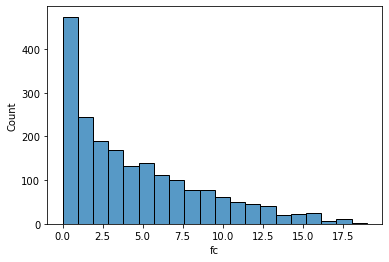

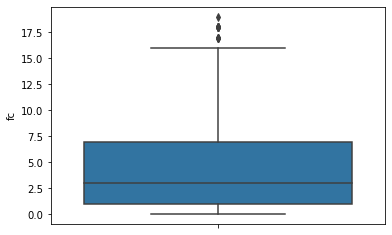

{'missing': 0,
 'min': 0,
 'max': 19,
 'mean': 4.31,
 'var': 18.85,
 'std': 4.34,
 'range': 19,
 'q1': 1.0,
 'q2': 3.0,
 'q3': 7.0,
 'skewness': 1.02,
 'kurtosis': 0.28}

In [115]:
univariate_num(data=df,x='fc')

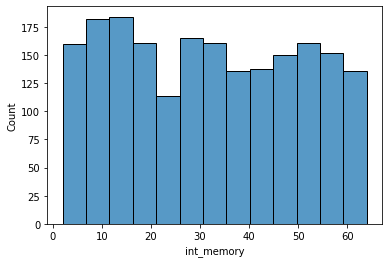

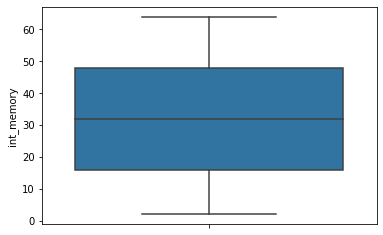

{'missing': 0,
 'min': 2,
 'max': 64,
 'mean': 32.05,
 'var': 329.27,
 'std': 18.15,
 'range': 62,
 'q1': 16.0,
 'q2': 32.0,
 'q3': 48.0,
 'skewness': 0.06,
 'kurtosis': -1.22}

In [116]:
univariate_num(data=df,x='int_memory')

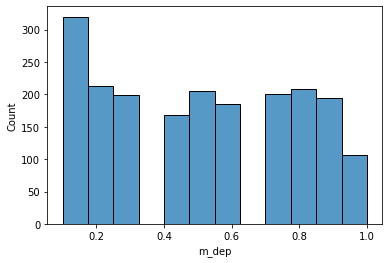

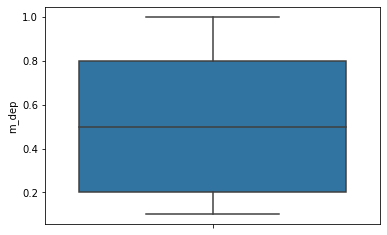

{'missing': 0,
 'min': 0.1,
 'max': 1.0,
 'mean': 0.5,
 'var': 0.08,
 'std': 0.29,
 'range': 0.9,
 'q1': 0.2,
 'q2': 0.5,
 'q3': 0.8,
 'skewness': 0.09,
 'kurtosis': -1.27}

In [117]:
univariate_num(data=df,x='m_dep')

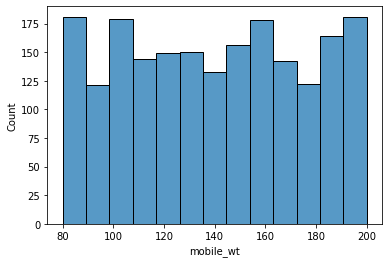

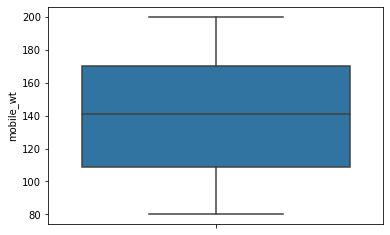

{'missing': 0,
 'min': 80,
 'max': 200,
 'mean': 140.25,
 'var': 1253.14,
 'std': 35.4,
 'range': 120,
 'q1': 109.0,
 'q2': 141.0,
 'q3': 170.0,
 'skewness': 0.01,
 'kurtosis': -1.21}

In [118]:
univariate_num(data=df,x='mobile_wt')

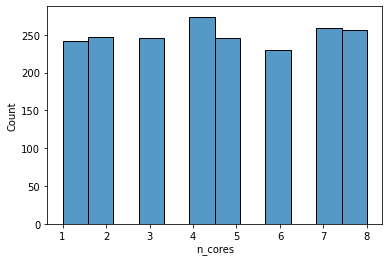

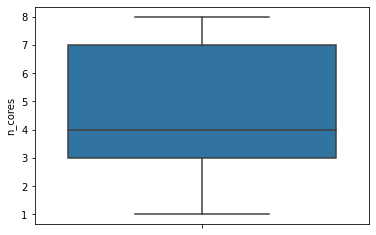

{'missing': 0,
 'min': 1,
 'max': 8,
 'mean': 4.52,
 'var': 5.23,
 'std': 2.29,
 'range': 7,
 'q1': 3.0,
 'q2': 4.0,
 'q3': 7.0,
 'skewness': 0.0,
 'kurtosis': -1.23}

In [119]:
univariate_num(data=df,x='n_cores')

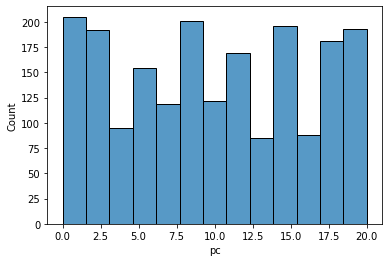

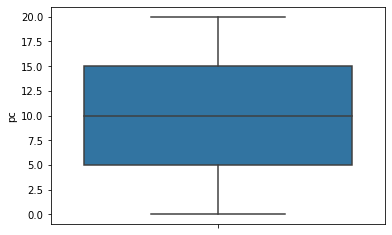

{'missing': 0,
 'min': 0,
 'max': 20,
 'mean': 9.92,
 'var': 36.78,
 'std': 6.06,
 'range': 20,
 'q1': 5.0,
 'q2': 10.0,
 'q3': 15.0,
 'skewness': 0.02,
 'kurtosis': -1.17}

In [120]:
univariate_num(data=df,x='pc')

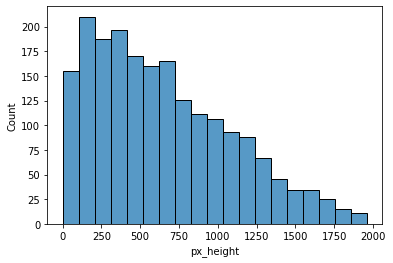

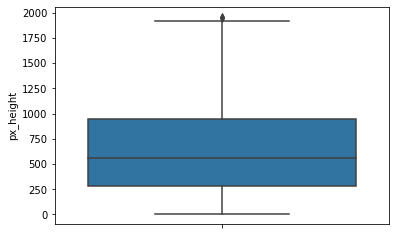

{'missing': 0,
 'min': 0,
 'max': 1960,
 'mean': 645.11,
 'var': 196941.41,
 'std': 443.78,
 'range': 1960,
 'q1': 282.75,
 'q2': 564.0,
 'q3': 947.25,
 'skewness': 0.67,
 'kurtosis': -0.32}

In [121]:
univariate_num(data=df,x='px_height')

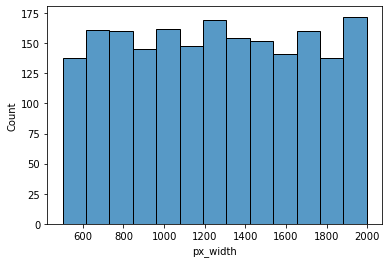

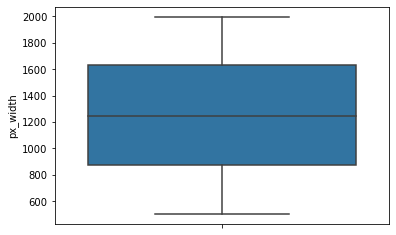

{'missing': 0,
 'min': 500,
 'max': 1998,
 'mean': 1251.52,
 'var': 186796.36,
 'std': 432.2,
 'range': 1498,
 'q1': 874.75,
 'q2': 1247.0,
 'q3': 1633.0,
 'skewness': 0.01,
 'kurtosis': -1.19}

In [122]:
univariate_num(data=df,x='px_width')

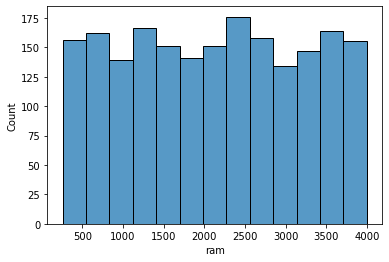

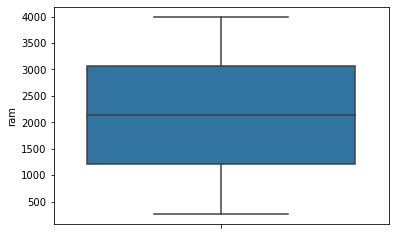

{'missing': 0,
 'min': 256,
 'max': 3998,
 'mean': 2124.21,
 'var': 1176643.61,
 'std': 1084.73,
 'range': 3742,
 'q1': 1207.5,
 'q2': 2146.5,
 'q3': 3064.5,
 'skewness': 0.01,
 'kurtosis': -1.19}

In [123]:
univariate_num(data=df,x='ram')

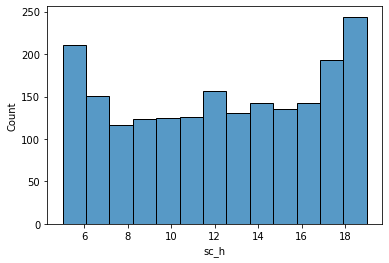

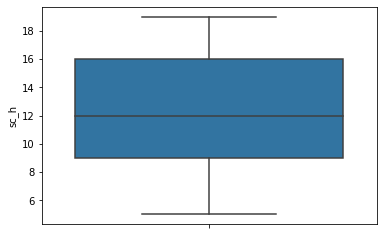

{'missing': 0,
 'min': 5,
 'max': 19,
 'mean': 12.31,
 'var': 17.75,
 'std': 4.21,
 'range': 14,
 'q1': 9.0,
 'q2': 12.0,
 'q3': 16.0,
 'skewness': -0.1,
 'kurtosis': -1.19}

In [124]:
univariate_num(data=df,x='sc_h')

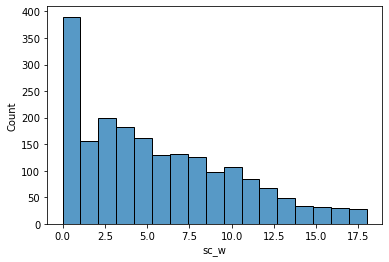

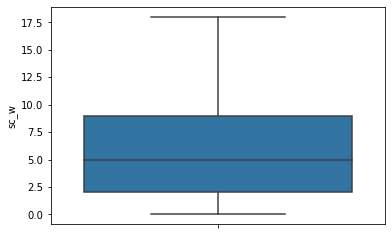

{'missing': 0,
 'min': 0,
 'max': 18,
 'mean': 5.77,
 'var': 18.98,
 'std': 4.36,
 'range': 18,
 'q1': 2.0,
 'q2': 5.0,
 'q3': 9.0,
 'skewness': 0.63,
 'kurtosis': -0.39}

In [125]:
univariate_num(data=df,x='sc_w')

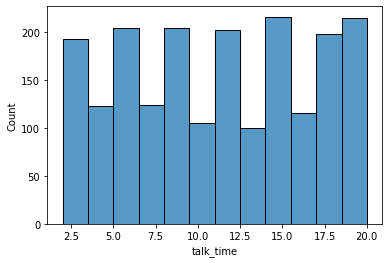

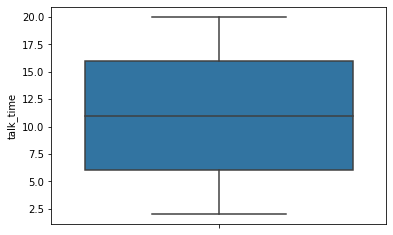

{'missing': 0,
 'min': 2,
 'max': 20,
 'mean': 11.01,
 'var': 29.85,
 'std': 5.46,
 'range': 18,
 'q1': 6.0,
 'q2': 11.0,
 'q3': 16.0,
 'skewness': 0.01,
 'kurtosis': -1.22}

In [126]:
univariate_num(data=df,x='talk_time')

In [127]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [128]:
df.groupby('price_range')['fc'].count()

price_range
0    500
1    500
2    500
3    500
Name: fc, dtype: int64

### we can see we have uniform distribution in front camera

In [142]:
df[df['battery_power']==1998]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
1354,1998,1.2,8,31,0.6,196,8,19,50,1356,2311,17,9.0,18,2


In [143]:
pixel=df[(df['fc']==0)&(df['pc']==0)]

In [144]:
pixel.sample()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
52,1654,1.5,0,43,0.3,109,2,0,546,629,3112,12,5.0,10,3


In [145]:
df[(df['px_height']==0)&(df['px_width']==0)].shape

(0, 15)

In [146]:
df[(df['px_height']==0)]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
1933,897,2.0,3,2,0.6,154,8,10,0,994,1958,7,5.0,7,1


In [147]:
df[df['sc_w']==0]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range


In [148]:
df['sc_w']=df['sc_w'].replace(0,np.nan)

C:\Users\HP\AppData\Local\Temp/ipykernel_8948/230326938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sc_w']=df['sc_w'].replace(0,np.nan)


In [149]:
df['sc_w']=df['sc_w'].replace(np.nan,0)

C:\Users\HP\AppData\Local\Temp/ipykernel_8948/507022803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sc_w']=df['sc_w'].replace(np.nan,0)


In [150]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7.0,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3.0,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2.0,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8.0,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2.0,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4.0,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10.0,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1.0,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10.0,19,0


In [151]:
df['sc_w'].unique()

array([ 7.,  3.,  2.,  8.,  1., 10.,  9., 15., 13.,  5., 11.,  4., 12.,
        6., 17., 14., 16., 18.])

In [152]:
df=df[df['sc_w']>0]

In [153]:
df['sc_w'].unique()

array([ 7.,  3.,  2.,  8.,  1., 10.,  9., 15., 13.,  5., 11.,  4., 12.,
        6., 17., 14., 16., 18.])

In [154]:
df.describe(percentiles=[0.01,0.02,0.03,0.04,0.25,.50,.75,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,25%,50%,75%,95%,96%,97%,98%,99%,max
battery_power,1820.0,1237.843956,439.940961,501.0,511.00,530.00,540.14,557.76,845.50,1230.5,1611.00,1929.05,1945.00,1959.43,1973.62,1986.00,1998.0
clock_speed,1820.0,1.519670,0.813829,0.5,0.50,0.50,0.50,0.50,0.70,1.5,2.20,2.80,2.90,2.90,2.90,3.00,3.0
fc,1820.0,4.319231,4.354894,0.0,0.00,0.00,0.00,0.00,1.00,3.0,7.00,13.00,14.00,15.00,16.00,16.00,19.0
int_memory,1820.0,32.139560,18.114542,2.0,2.00,2.38,3.00,4.00,16.00,32.0,48.00,61.00,62.00,63.00,63.00,64.00,64.0
m_dep,1820.0,0.499890,0.288805,0.1,0.10,0.10,0.10,0.10,0.20,0.5,0.80,1.00,1.00,1.00,1.00,1.00,1.0
mobile_wt,1820.0,140.585714,35.428886,80.0,81.00,82.00,83.00,84.00,109.00,141.5,170.25,196.00,197.00,198.00,199.00,199.81,200.0
n_cores,1820.0,4.532967,2.289520,1.0,1.00,1.00,1.00,1.00,3.00,5.0,7.00,8.00,8.00,8.00,8.00,8.00,8.0
pc,1820.0,9.882418,6.007821,0.0,0.00,0.00,0.00,0.00,5.00,10.0,15.00,20.00,20.00,20.00,20.00,20.00,20.0
px_height,1820.0,646.731319,444.877537,0.0,18.19,35.38,48.00,61.28,283.75,561.5,952.00,1486.45,1568.24,1618.43,1698.00,1794.43,1960.0
px_width,1820.0,1252.686264,432.342583,500.0,513.38,527.00,544.00,562.76,877.00,1250.0,1633.00,1925.15,1942.00,1963.00,1973.62,1986.81,1998.0


## KNN

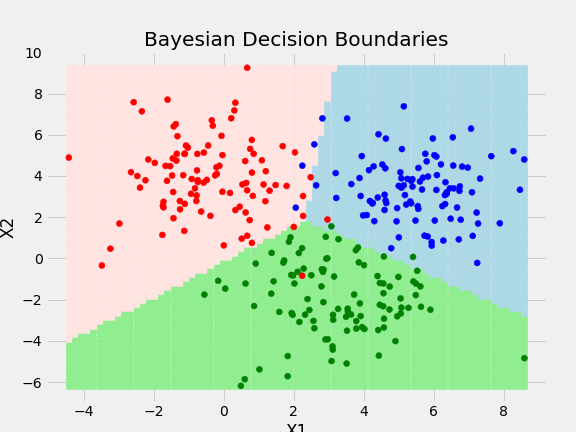

In [168]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7.0,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3.0,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2.0,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8.0,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2.0,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4.0,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10.0,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1.0,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10.0,19,0


In [169]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [172]:
from sklearn.neighbors import KNeighborsClassifier

In [173]:
from sklearn.preprocessing import StandardScaler

In [174]:
st=StandardScaler()

In [175]:
x_train_st=st.fit_transform(x_train)
x_test_st=st.transform(x_test)

In [176]:
x_train_st

array([[-0.77197491,  0.22372067, -0.76936877, ...,  0.62035111,
        -0.82474178,  1.2898265 ],
       [ 0.68209636,  0.8471243 ,  0.37516161, ..., -0.83067823,
        -1.06589878, -0.36740688],
       [ 1.07121403, -0.52436368, -0.76936877, ..., -0.58884001,
        -0.34242779, -1.47222913],
       ...,
       [-1.22708329,  0.09903995, -0.08265055, ...,  0.62035111,
         0.86335719,  0.18500425],
       [ 1.60596637,  0.47308212, -0.99827485, ...,  0.86218934,
        -0.34242779, -1.47222913],
       [ 0.0540468 ,  1.71988938, -0.5404627 , ...,  1.58770401,
         0.86335719, -0.55154392]])

In [177]:
knn1=KNeighborsClassifier()

In [178]:
knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [179]:
knn1.score(x_train,y_train)

0.9560439560439561

In [180]:
knn1.score(x_test,y_test)

0.9139194139194139

In [181]:
k1=[3,5,7,9,11,13,15,17,19,21]
p=[1,2,3]
train=[]
test=[]
for i in k1:
    for j in p:
            knn2=KNeighborsClassifier(n_neighbors=i)
            knn2.fit(x_train,y_train)
            train_ac=knn2.score(x_train,y_train)
            test_ac=knn2.score(x_test,y_test)
            train.append(train_ac)
            test.append(test_ac)
            print(f'for k= {i} and p={j},Train accuracy={train_ac} and test accuracy ={test_ac}')

for k= 3 and p=1,Train accuracy=0.9560439560439561 and test accuracy =0.9029304029304029
for k= 3 and p=2,Train accuracy=0.9560439560439561 and test accuracy =0.9029304029304029
for k= 3 and p=3,Train accuracy=0.9560439560439561 and test accuracy =0.9029304029304029
for k= 5 and p=1,Train accuracy=0.9560439560439561 and test accuracy =0.9139194139194139
for k= 5 and p=2,Train accuracy=0.9560439560439561 and test accuracy =0.9139194139194139
for k= 5 and p=3,Train accuracy=0.9560439560439561 and test accuracy =0.9139194139194139
for k= 7 and p=1,Train accuracy=0.9466248037676609 and test accuracy =0.9358974358974359
for k= 7 and p=2,Train accuracy=0.9466248037676609 and test accuracy =0.9358974358974359
for k= 7 and p=3,Train accuracy=0.9466248037676609 and test accuracy =0.9358974358974359
for k= 9 and p=1,Train accuracy=0.9474097331240189 and test accuracy =0.9377289377289377
for k= 9 and p=2,Train accuracy=0.9474097331240189 and test accuracy =0.9377289377289377
for k= 9 and p=3,Trai

In [182]:
dfg=[]
for i in k1:
    for j in p:
        l=str(i)+'-'+str(j)
        dfg.append(l)

In [184]:
dfg

['3-1',
 '3-2',
 '3-3',
 '5-1',
 '5-2',
 '5-3',
 '7-1',
 '7-2',
 '7-3',
 '9-1',
 '9-2',
 '9-3',
 '11-1',
 '11-2',
 '11-3',
 '13-1',
 '13-2',
 '13-3',
 '15-1',
 '15-2',
 '15-3',
 '17-1',
 '17-2',
 '17-3',
 '19-1',
 '19-2',
 '19-3',
 '21-1',
 '21-2',
 '21-3']

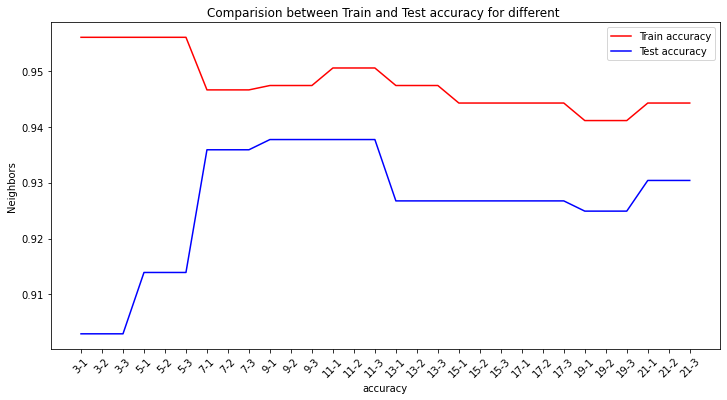

In [185]:
plt.figure(figsize=(12,6))
plt.plot(dfg,train,label='Train accuracy',color='r')
plt.plot(dfg,test,label='Test accuracy',color='b')

plt.title('Comparision between Train and Test accuracy for different ')
plt.xlabel('accuracy')
plt.xticks(rotation=45)
plt.ylabel('Neighbors')
plt.legend()
plt.show()

from above graph,we can conclude that at `k=7`,the difference between accuracy is min

In [186]:
knn3=KNeighborsClassifier(n_neighbors=7,p=1)
knn3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [187]:
knn3.score(x_train,y_train)

0.9497645211930926

In [188]:
knn3.score(x_test,y_test)

0.9212454212454212

In [189]:
from sklearn import metrics

In [190]:
pred_train=knn3.predict(x_train)

In [191]:
pred_test=knn3.predict(x_test)

In [192]:
cm=metrics.confusion_matrix(y_train,pred_train)

In [193]:
pd.DataFrame(cm,columns=['pred_low','pred_median','pred_high','pred_veryhigh'],
            index=['act_low','act_median','act_high','act_veryhigh'])

,pred_low,pred_median,pred_high,pred_veryhigh
act_low,312,5,0,0
act_median,5,295,8,0
act_high,0,16,299,9
act_veryhigh,0,0,21,304


In [194]:
cd=metrics.confusion_matrix(y_test,pred_test)

In [195]:
pd.DataFrame(cd,columns=['pred_low','pred_median','pred_high','pred_veryhigh'],
            index=['act_low','act_median','act_high','act_veryhigh'])

,pred_low,pred_median,pred_high,pred_veryhigh
act_low,129,5,0,0
act_median,8,131,5,0
act_high,0,6,117,9
act_veryhigh,0,0,10,126


In [196]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       317
           1       0.93      0.96      0.95       308
           2       0.91      0.92      0.92       324
           3       0.97      0.94      0.95       325

    accuracy                           0.95      1274
   macro avg       0.95      0.95      0.95      1274
weighted avg       0.95      0.95      0.95      1274



In [197]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       134
           1       0.92      0.91      0.92       144
           2       0.89      0.89      0.89       132
           3       0.93      0.93      0.93       136

    accuracy                           0.92       546
   macro avg       0.92      0.92      0.92       546
weighted avg       0.92      0.92      0.92       546

